# Feature Importance

## Notebook Setup

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_transformer

# Import custom functions
import env_functions as ef
import s3_functions as sf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Determine the environment and get appropriate vars
deepnote, env_vars = ef.load_env_vars()

# Iterate through the vars and set them as global vars
for var_name, var in env_vars.items():
    globals()[var_name] = var

# If not in the DeepNote environment, create a dict for aws creds
#   that were located in the environment file.  This will be passed
#   to all aws s3 functions.
if not deepnote:
    aws_env_vars = {
        'access_key_id': aws_access_key_id,
        'secret_access_key': aws_secret_access_key,
        'bucket_name': s3_bucket_name
    }

Loading dotenv file


### Import and Filter Data

In [3]:
if deepnote:
    # GLOB Data
    X_train_GLOB = pd.read_parquet("/work/data/Xy_Data/X_train_GLOB.parquet")
    X_val_GLOB = pd.read_parquet("/work/data/Xy_Data/X_val_GLOB.parquet")
    X_holdout_GLOB = pd.read_parquet("/work/data/Xy_Data/X_holdout_GLOB.parquet")
    
    y_train_GLOB = pd.read_parquet("/work/data/Xy_Data/y_train_GLOB.parquet")
    y_val_GLOB = pd.read_parquet("/work/data/Xy_Data/y_val_GLOB.parquet")
    y_holdout_GLOB = pd.read_parquet("/work/data/Xy_Data/y_holdout_GLOB.parquet")
    
    # CARB Data
    X_train_CARB = pd.read_parquet("/work/data/Xy_Data/X_train_CARB.parquet")
    X_val_CARB = pd.read_parquet("/work/data/Xy_Data/X_val_CARB.parquet")
    X_holdout_CARB = pd.read_parquet("/work/data/Xy_Data/X_holdout_CARB.parquet")
    
    y_train_CARB = pd.read_parquet("/work/data/Xy_Data/y_train_CARB.parquet")
    y_val_CARB = pd.read_parquet("/work/data/Xy_Data/y_val_CARB.parquet")
    y_holdout_CARB = pd.read_parquet("/work/data/Xy_Data/y_holdout_CARB.parquet")
    
    # SEAA Data
    X_train_SEAA = pd.read_parquet("/work/data/Xy_Data/X_train_SEAA.parquet")
    X_val_SEAA = pd.read_parquet("/work/data/Xy_Data/X_val_SEAA.parquet")
    X_holdout_SEAA = pd.read_parquet("/work/data/Xy_Data/X_holdout_SEAA.parquet")
    
    y_train_SEAA = pd.read_parquet("/work/data/Xy_Data/y_train_SEAA.parquet")
    y_val_SEAA = pd.read_parquet("/work/data/Xy_Data/y_val_SEAA.parquet")
    y_holdout_SEAA = pd.read_parquet("/work/data/Xy_Data/y_holdout_SEAA.parquet")
else:
    # GLOB Data
    X_train_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_train_GLOB.parquet", **aws_env_vars))
    X_val_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_val_GLOB.parquet", **aws_env_vars))
    X_holdout_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_holdout_GLOB.parquet", **aws_env_vars))
    
    y_train_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_train_GLOB.parquet", **aws_env_vars))
    y_val_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_val_GLOB.parquet", **aws_env_vars))
    y_holdout_GLOB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_holdout_GLOB.parquet", **aws_env_vars))
    
    # CARB Data
    X_train_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_train_CARB.parquet", **aws_env_vars))
    X_val_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_val_CARB.parquet", **aws_env_vars))
    X_holdout_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_holdout_CARB.parquet", **aws_env_vars))
    
    y_train_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_train_CARB.parquet", **aws_env_vars))
    y_val_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_val_CARB.parquet", **aws_env_vars))
    y_holdout_CARB = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_holdout_CARB.parquet", **aws_env_vars))
    
    # SEAA Data
    X_train_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_train_SEAA.parquet", **aws_env_vars))
    X_val_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_val_SEAA.parquet", **aws_env_vars))
    X_holdout_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/X_holdout_SEAA.parquet", **aws_env_vars))
    
    y_train_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_train_SEAA.parquet", **aws_env_vars))
    y_val_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_val_SEAA.parquet", **aws_env_vars))
    y_holdout_SEAA = pd.read_parquet(sf.load_from_s3(file_path="data/Xy_Data/y_holdout_SEAA.parquet", **aws_env_vars))

In [4]:
drop_cols = ['Sample_ID', 'Site_ID', 'Reef_ID', 'Date_Day', 'Date_Month',
             'Date_Year', 'Ocean_Name','Realm_Name',
             'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
             'City_Town_Name_1', 'City_Town_Name_2', 'City_Town_Name_3',
             'City_Town_Name_4', 'Data_Source', 'Bleached_Value_Imputed', 'Date',
             'Month_Name', 'Month_Year', 'Country_Code', 'Exposure_Cat',
             'Country_Name_Cat', 'PROVINCE', 'Year', 'Exposure', 'Substrate_Name']

In [5]:
X_train_GLOB = X_train_GLOB.drop(columns=drop_cols)
X_val_GLOB = X_val_GLOB.drop(columns=drop_cols)
X_holdout_GLOB = X_holdout_GLOB.drop(columns=drop_cols)

X_train_CARB = X_train_CARB.drop(columns=drop_cols)
X_val_CARB = X_val_CARB.drop(columns=drop_cols)
X_holdout_CARB = X_holdout_CARB.drop(columns=drop_cols)

X_train_SEAA = X_train_SEAA.drop(columns=drop_cols)
X_val_SEAA = X_val_SEAA.drop(columns=drop_cols)
X_holdout_SEAA = X_holdout_SEAA.drop(columns=drop_cols)

### Principal Components Analysis (PCA) - Scree Plot

In [6]:
def custom_PCA_Scree(X_train_Reduced, n_components=15, RANDOM_STATE=0, ax=None):
    """
        :: Input(s) ::
            X_train_Reduced - training data with only numeric columns
            n_components - the number of principal components you would like to see
            RANDOM_STATE - Random State of the PCA process so that repeatability is ensured
        :: Output(s) ::
            None
        :: Explaination of Function ::
        This fucntion performs Principal Components Analysis (PCA)
        The goal here is two fold:
            1. Generate a Scree Plot that incorporates an explained varaince ratio
            2. Help the user determine the minumum number of components in order to consider utilizing PCA
    """

    # Normalize the data prior to performing PCA!
    # This is crucial as we do not want magnitude of a feature to play a role
    X_train_Norm = StandardScaler().fit_transform(X_train_Reduced)
    pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_train_Norm)

    # Since the n_comp is dynamic, we need a dynamic way to show the PC's
    PCs = []
    for i in range(len(X_train_Reduced.columns)):
        PCs.append('{}'.format(i+1))

    PCs = PCs[:n_components]

    # Generate the Cumulative Sum of Explained Variance
    dfCumul = pd.DataFrame({'perc_explained_var_ratio': pca.explained_variance_ratio_,
                            'PC': PCs})
    dfCumul['cumulative_variance'] = dfCumul['perc_explained_var_ratio'].cumsum()

    # Generate the Scree Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    ax.plot(dfCumul['PC'], dfCumul['perc_explained_var_ratio'], color='b', marker='o', linestyle='--', label='Variance Explained by PC')
    ax.set_xlabel('Principal Component (PC)')
    ax.set_ylabel('Percentage of Explained Variance')
    ax.set_title('PCA Scree Plot')
    ax.plot(dfCumul['PC'], dfCumul['cumulative_variance'], color='k', label="Cumulative Variance Explained")
    ax.legend(loc='upper center')

    if ax is None:
        plt.show()

    return None

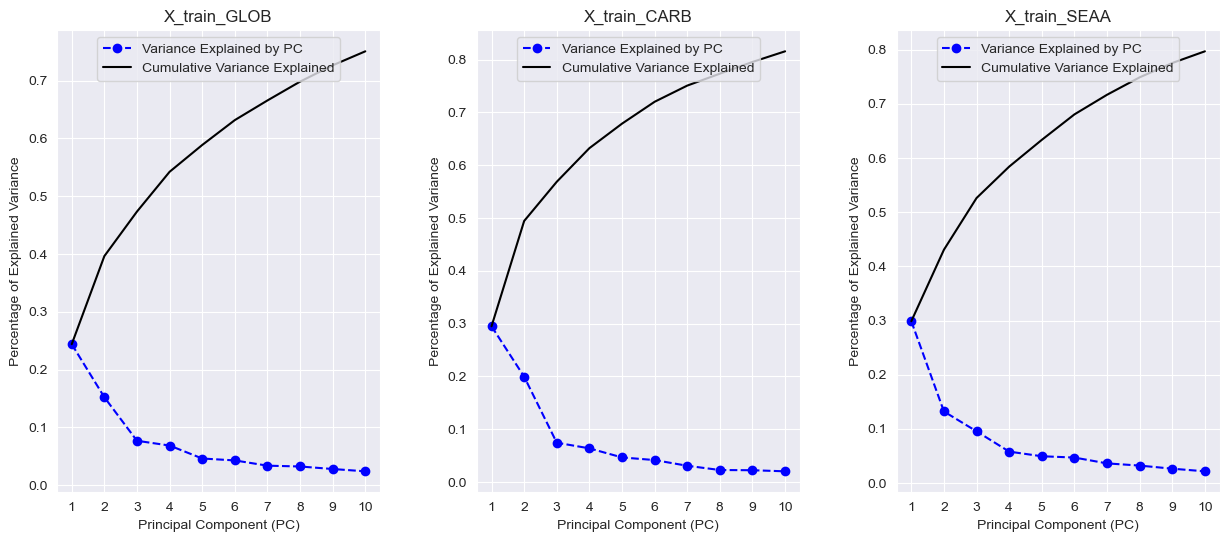

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

data_dict = {'X_train_GLOB': X_train_GLOB, 'X_train_CARB': X_train_CARB, 'X_train_SEAA': X_train_SEAA}

for idx, (name, frame) in enumerate(data_dict.items()):
    ax = axes[idx]
    custom_PCA_Scree(frame, n_components=10, RANDOM_STATE=0, ax=ax)
    ax.set_title(name)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Principal Components Analysis (PCA) - BiPlot

In [8]:
def custom_BiPlot(X_train_Reduced, dimensions=2, n_comps=3, show=False, RANDOM_STATE=0):
    """
        :: Input(s) ::
            X_train_Reduced - training data with only numeric columns
            dimensions - The number of dimensions that we can plot in (must be either 2 or 3)
            n_comps - The number of components that you would like included in the feature extraction piece of this function
            show - A flag which either shows the plot created or hides it
            RANDOM_STATE - Random State of the PCA process so that repeatability is ensured
        :: Output(s) ::
            pca - The PCA model (giving the user to access the attributes of said model)
            X_pca - The data points that were used to generate the figure
            dfFeatures - A pandas dataframe containing the feature selections and feature extractions
        :: Explaination of Function ::
            This function creates a biplot from the PCA solution in either 2d or 3d.
            The biplot shows the two (or three) principal components with the biggest eigenvalues (PC's that explain the most variance in the data)
            and plots the data as well as the original features as vectors in this space.

            It also returns the features from the original feature space that most closely align (via cosine similiarity) to each principal component (feature selection)
            as well as the group of features (indicated by n_comps) that most closely aligns with each principal component which could in turn be used by the user to
            estimate a sort of "latent feature name" for each PC (feature extraction)
    """
    # Error Handling
    if (dimensions < 2) or (dimensions > 3):
        print("Dimensions must be either 2 or 3! Try again!")
        return None
    
    # Normalize the data prior to performing PCA!
    # This is crucial as we do not want magnitude of a feature to play a role
    X_train_Norm = StandardScaler().fit_transform(X_train_Reduced)
    pca = PCA(n_components=dimensions,
              random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_train_Norm)

    # Generate the Plot
    plt.figure(figsize=(8, 6))
    maxdim = len(X_train_Reduced.columns)

    if dimensions == 2:
        coeff = np.transpose(pca.components_[0:2, :])

        xs = X_pca[:,0]
        ys = X_pca[:,1]

        n = min(coeff.shape[0], maxdim)
        scalex = 2.0 / (xs.max() - xs.min())
        scaley = 2.0 / (ys.max() - ys.min())
        text_scale_factor = 1.5

        plt.scatter(xs * scalex, ys * scaley, s=5)

        top_comps_PC1 = []
        top_comps_PC2 = []

        for i in range(n):
            # TEXT PLOTTING LOGIC
            plt.arrow(0,0,coeff[i,0],coeff[i,1],color='red',alpha=0.5)
            plt.text(
                coeff[i,0] * text_scale_factor,
                coeff[i,1] * text_scale_factor,
                X_train_Reduced.columns[i],
                color='g',
                ha='center',
                va='center'
            )

            # Let's also keep track of the components that are most like each PC
            PC1 = np.array([1,0])
            PC2 = np.array([0,1])

            featureVector = coeff[i]

            cosine_similarity_PC1 = np.dot(featureVector, PC1) / (np.linalg.norm(featureVector) * np.linalg.norm(PC1))
            cosine_similarity_PC2 = np.dot(featureVector, PC2) / (np.linalg.norm(featureVector) * np.linalg.norm(PC2))

            top_comps_PC1.append((cosine_similarity_PC1, X_train_Reduced.columns[i]))
            top_comps_PC2.append((cosine_similarity_PC2, X_train_Reduced.columns[i]))

        sorted_top_comps_PC1 = sorted(top_comps_PC1, key=lambda x: x[0], reverse=True)
        sorted_top_comps_PC2 = sorted(top_comps_PC2, key=lambda x: x[0], reverse=True)

        top_comps_PC1 = [item[1] for item in sorted_top_comps_PC1]
        top_comps_PC2 = [item[1] for item in sorted_top_comps_PC2]

        outDict = {'Feature_Selection_PC1': top_comps_PC1[0],
                   'Feature_Selection_PC2': top_comps_PC2[0],
                   'Feature_Extraction_PC1': top_comps_PC1[:n_comps],
                   'Feature_Extraction_PC2': top_comps_PC2[:n_comps]}
        
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.title('PCA Biplot')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid()
        
        if show:
            plt.tight_layout()
            plt.show()

        dfFeatures = pd.DataFrame(outDict)

        return pca, X_pca, dfFeatures
    else:
        coeff = np.transpose(pca.components_[0:3, :])

        xs = X_pca[:,0]
        ys = X_pca[:,1]
        zs = X_pca[:,2]

        n = min(coeff.shape[0], maxdim)
        scalex = 2.0 / (xs.max() - xs.min())
        scaley = 2.0 / (ys.max() - ys.min())
        scalez = 2.0 / (zs.max() - zs.min())
        text_scale_factor = 1.5

        ax = plt.axes(projection='3d')
        ax.grid()
        scatter = ax.scatter(xs * scalex,
                             ys * scaley,
                             zs * scalez,
                             s=5)

        top_comps_PC1 = []
        top_comps_PC2 = []
        top_comps_PC3 = []
        
        for i in range(n):
            # TEXT PLOTTING LOGIC
            ax.quiver(0, 0, 0,
                      coeff[i,0], coeff[i,1], coeff[i,2],
                      color='red')
            ax.text(
                coeff[i,0] * text_scale_factor,
                coeff[i,1] * text_scale_factor,
                coeff[i,2] * text_scale_factor,
                X_train_Reduced.columns[i],
                color='g',
                ha='center',
                va='center'
            )

            # Let's also keep track of the components that are most like each PC
            PC1 = np.array([1,0,0])
            PC2 = np.array([0,1,0])
            PC3 = np.array([0,0,1])

            featureVector = coeff[i]

            cosine_similarity_PC1 = np.dot(featureVector, PC1) / (np.linalg.norm(featureVector) * np.linalg.norm(PC1))
            cosine_similarity_PC2 = np.dot(featureVector, PC2) / (np.linalg.norm(featureVector) * np.linalg.norm(PC2))
            cosine_similarity_PC3 = np.dot(featureVector, PC3) / (np.linalg.norm(featureVector) * np.linalg.norm(PC3))

            top_comps_PC1.append((cosine_similarity_PC1, X_train_Reduced.columns[i]))
            top_comps_PC2.append((cosine_similarity_PC2, X_train_Reduced.columns[i]))
            top_comps_PC3.append((cosine_similarity_PC3, X_train_Reduced.columns[i]))
        
        sorted_top_comps_PC1 = sorted(top_comps_PC1, key=lambda x: x[0], reverse=True)
        sorted_top_comps_PC2 = sorted(top_comps_PC2, key=lambda x: x[0], reverse=True)
        sorted_top_comps_PC3 = sorted(top_comps_PC3, key=lambda x: x[0], reverse=True)

        top_comps_PC1 = [item[1] for item in sorted_top_comps_PC1]
        top_comps_PC2 = [item[1] for item in sorted_top_comps_PC2]
        top_comps_PC3 = [item[1] for item in sorted_top_comps_PC3]

        outDict = {'Feature_Selection_PC1': top_comps_PC1[0],
                   'Feature_Selection_PC2': top_comps_PC2[0],
                   'Feature_Selection_PC3': top_comps_PC3[0],
                   'Feature_Extraction_PC1': top_comps_PC1[:n_comps],
                   'Feature_Extraction_PC2': top_comps_PC2[:n_comps],
                   'Feature_Extraction_PC3': top_comps_PC3[:n_comps]}
        
        ax.set_xlim(-1,1)
        ax.set_ylim(-1,1)
        ax.set_zlim(-1,1)
        ax.set_title("PCA Biplot")
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_box_aspect(aspect=None, zoom=0.9)

        if show:
            plt.show()

        dfFeatures = pd.DataFrame(outDict)

        return pca, X_pca, dfFeatures

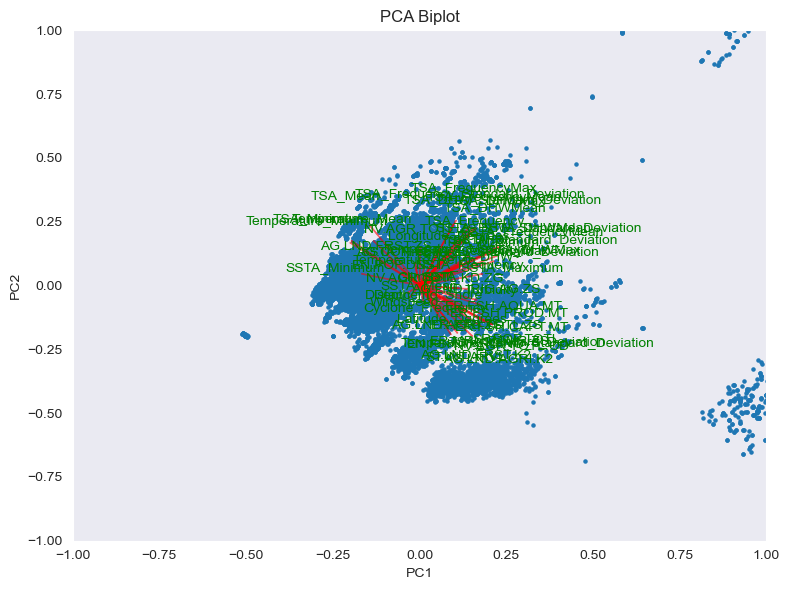

In [9]:
pca, X_pca, dfFeatures = custom_BiPlot(X_train_GLOB, dimensions=2, show=True)

In [10]:
dfFeatures

,Feature_Selection_PC1,Feature_Selection_PC2,Feature_Extraction_PC1,Feature_Extraction_PC2
0,Turbidity,SSTA_Mean,Turbidity,SSTA_Mean
1,Turbidity,SSTA_Mean,SSTA_Mean,NV.AGR.TOTL.ZS
2,Turbidity,SSTA_Mean,AG.LND.IRIG.AG.ZS,AG.CON.FERT.ZS


### Simple Decision Tree - Feature Importance

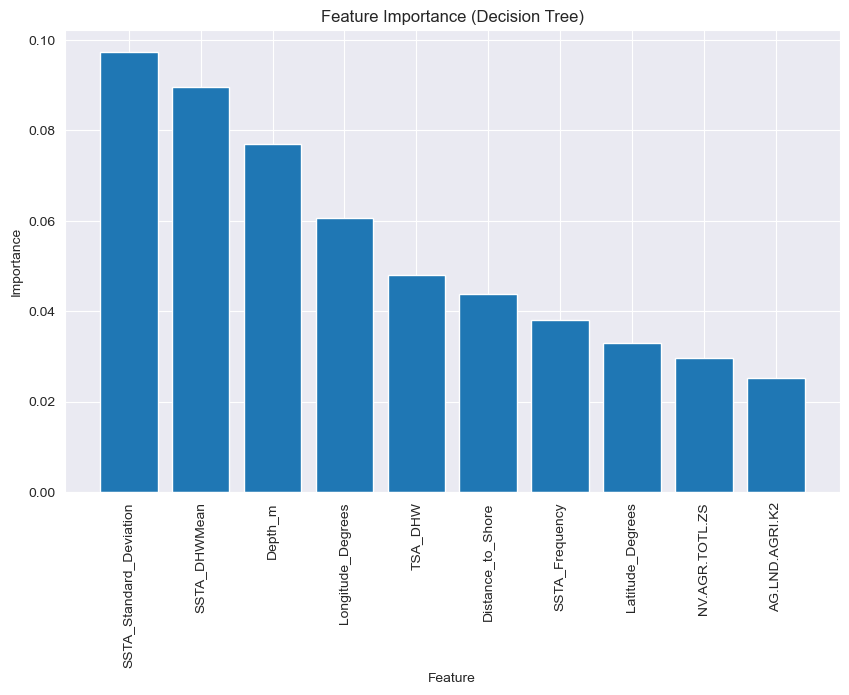

In [11]:
def feature_selection_tree_importance(X, y, features, n_features=5):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create a DecisionTreeRegressor and fit it
    model = DecisionTreeRegressor()
    model.fit(X_scaled, y)

    # Get feature importances
    importances = model.feature_importances_

    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(importances)[::-1]
    plt.bar(range(n_features), importances[sorted_idx][:n_features], align="center")
    plt.xticks(range(n_features), [features[i] for i in sorted_idx[:n_features]], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance (Decision Tree)')
    plt.show()

    selected_features = [features[i] for i in sorted_idx[:n_features]]

    return selected_features

# Call the function for both datasets
selected_features = feature_selection_tree_importance(X_train_GLOB, y_train_GLOB, X_train_GLOB.columns,10)

### Correlation Matrix

<Axes: title={'center': 'Pearson Correlation Matrix'}>

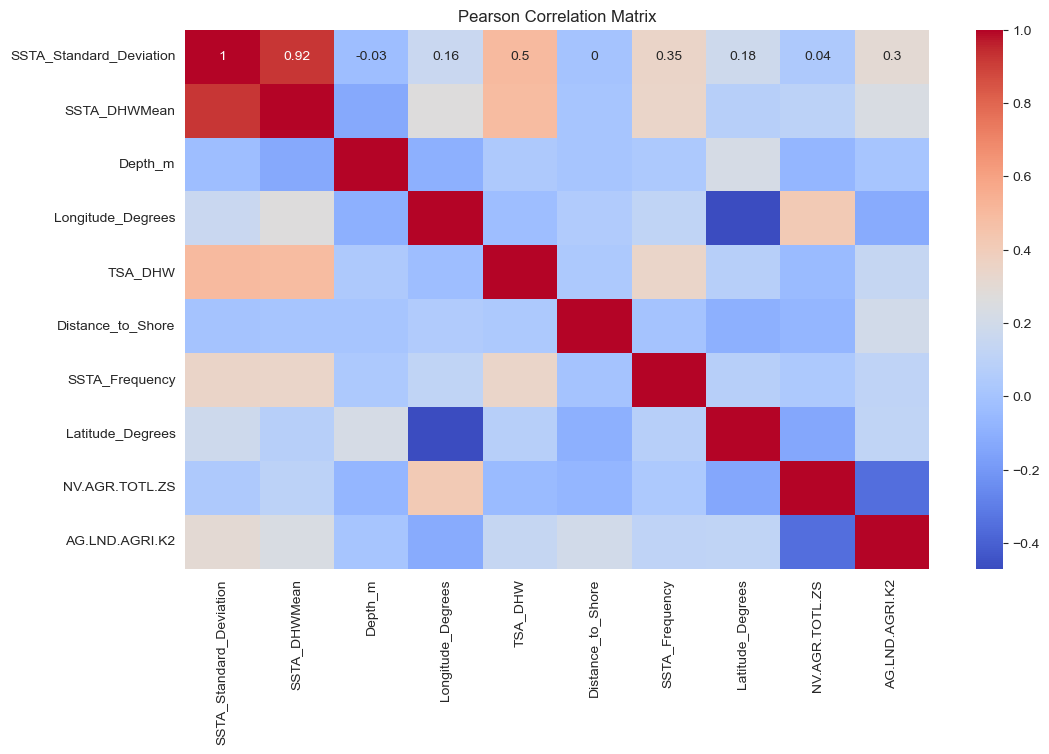

In [12]:
# Pearson Correlation matrix

plt.figure(figsize=(12,7))
plt.title('Pearson Correlation Matrix')
sns.heatmap(X_train_GLOB[selected_features].corr().round(2),annot=True, cmap = 'coolwarm')